In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df=  pd.read_csv('Voices_Cleaned.csv', index_col=0)

In [3]:
df= df.drop(columns=['date','age','user','pronounce'])

# 1- First to model with only 1 feature "third_q"

In [23]:
model_features = ['mean']

In [24]:
df.sex = df.sex.astype(int)

In [25]:
oversample = SMOTE(random_state=23)

In [26]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "sex"]
    x_labels=x.loc[:,x.columns=="sex"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of testing data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [27]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)

length of training data
4377
length of testing data
1095


In [28]:
columns = data_train_X.columns

In [29]:
os_data_X,os_data_y=oversample.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["sex"])

print("length of oversampled data is ",len(os_data_X))
print("Number of males in oversampled data",len(os_data_y[os_data_y["sex"]==0]))
print("No.of females in oversampled data",len(os_data_y[os_data_y["sex"]==1]))

length of oversampled data is  8114
Number of males in oversampled data 4057
No.of females in oversampled data 4057


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
scaler = StandardScaler()
scaler.fit(df.loc[:,model_features]) 
X_train = scaler.transform(os_data_X.loc[:,model_features])
X_test = scaler.transform(data_test_X.loc[:,model_features])
y_train = list(os_data_y['sex'].values)
y_test = list(data_test_y['sex'].values)

In [31]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))



Decision Tree Report
train score is 0.9995070248952428
test score is 0.5616438356164384
Random Forests Report
train score is 0.9993837811190535
test score is 0.5607305936073059
Gradient Boosting Report
train score is 0.6562731082080355
test score is 0.6995433789954338


In [32]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))


    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))

the accuracy for this model is : 0.5616438356164384
the recall for this model is : 0.5211267605633803
TP 37
TN 578
FP 446
FN 34


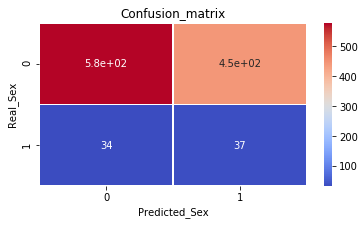


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.94      0.56      0.71      1024
           1       0.08      0.52      0.13        71

   micro avg       0.56      0.56      0.56      1095
   macro avg       0.51      0.54      0.42      1095
weighted avg       0.89      0.56      0.67      1095



In [33]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.5607305936073059
the recall for this model is : 0.5211267605633803
TP 37
TN 577
FP 447
FN 34


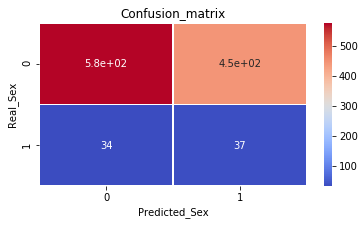


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.94      0.56      0.71      1024
           1       0.08      0.52      0.13        71

   micro avg       0.56      0.56      0.56      1095
   macro avg       0.51      0.54      0.42      1095
weighted avg       0.89      0.56      0.67      1095



In [34]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.6995433789954338
the recall for this model is : 0.5211267605633803
TP 37
TN 729
FP 295
FN 34


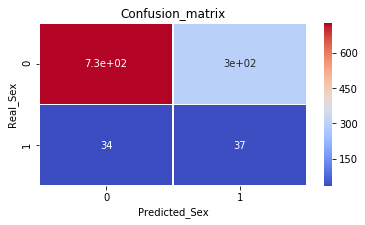


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1024
           1       0.11      0.52      0.18        71

   micro avg       0.70      0.70      0.70      1095
   macro avg       0.53      0.62      0.50      1095
weighted avg       0.90      0.70      0.77      1095



In [35]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)